## Limpieza y transformación de datos

In [20]:
#Dirección de los datos
parent_folder = '/Users/Techs/Desktop/spotify/Spotify_Streaming_History'

file_name = 'Streaming_History_Audio_*.json'

In [ ]:
# Instalar librerias
# pip install pandas matplotlib seaborn

In [21]:
#Librerías

import pandas as pd
import glob # Busca archivos con un patrón
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#Juntar todos los archivos en un mismo data frame
df = pd.DataFrame()

for file in glob.glob(parent_folder + '/' + file_name):
    temp = pd.read_json(file)
    df = pd.concat([df, temp])

In [32]:
df = df.drop(columns=['conn_country',
                      'episode_name',
                      'episode_show_name',
                      'spotify_episode_uri',
                      'audiobook_title',
                      'audiobook_uri',
                      'audiobook_chapter_uri',
                      'audiobook_chapter_title',
                      'reason_start',
                      'reason_end',
                      'shuffle',
                      'offline',
                      'offline_timestamp',
                      'incognito_mode',
                      'spotify_track_uri'
                      ])

In [34]:
print(df.shape) #Número de filas y columnas
df

(107311, 6)


,ts,ms_played,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,skipped
0,2017-03-20T10:24:39Z,2606,불타오르네 FIRE,BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False
1,2017-03-20T10:33:16Z,3111,House of Cards (Full Length Edition),BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False
2,2017-03-20T10:33:23Z,1696,Wake Me Up - Radio Edit,Avicii,True,False
3,2017-03-20T10:33:24Z,0,Save ME,BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False
4,2017-03-20T10:33:25Z,0,Silent Scream,Anna Blue,Silent Scream,False
...,...,...,...,...,...,...
12742,2025-02-11T20:48:30Z,224826,Crying Lightning,Arctic Monkeys,Humbug,False
12743,2025-02-11T20:50:00Z,88683,"Hey kid, Close your eyes (with Lee Sun Hee)",AKMU,NEXT EPISODE,True
12744,2025-02-11T20:53:27Z,208106,Paralyzer,Finger Eleven,Them Vs. You Vs. Me,False
12745,2025-02-11T20:53:57Z,29036,Ignorance,Paramore,Brand New Eyes,True


In [35]:
#Renombrar los nombres de las columnas para mayor comodidad
df = df.rename(columns={'ms_played': 'ms',
                        'master_metadata_track_name': 'track',
                        'master_metadata_album_artist_name': 'artist',
                        'master_metadata_album_album_name': 'album'
                        })

df

,ts,ms,track,artist,album,skipped
0,2017-03-20T10:24:39Z,2606,불타오르네 FIRE,BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False
1,2017-03-20T10:33:16Z,3111,House of Cards (Full Length Edition),BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False
2,2017-03-20T10:33:23Z,1696,Wake Me Up - Radio Edit,Avicii,True,False
3,2017-03-20T10:33:24Z,0,Save ME,BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False
4,2017-03-20T10:33:25Z,0,Silent Scream,Anna Blue,Silent Scream,False
...,...,...,...,...,...,...
12742,2025-02-11T20:48:30Z,224826,Crying Lightning,Arctic Monkeys,Humbug,False
12743,2025-02-11T20:50:00Z,88683,"Hey kid, Close your eyes (with Lee Sun Hee)",AKMU,NEXT EPISODE,True
12744,2025-02-11T20:53:27Z,208106,Paralyzer,Finger Eleven,Them Vs. You Vs. Me,False
12745,2025-02-11T20:53:57Z,29036,Ignorance,Paramore,Brand New Eyes,True


#### Ajustar la zona horaria

In [36]:
#Convertir 'ts' de string a datetime
df['ts'] = pd.to_datetime(df['ts'], format = '%Y-%m-%dT%H:%M:%SZ', utc = True)

#Ajustar el tiempo a mi zona horaria
import pytz
my_tz = pytz.timezone('Europe/Madrid')
df['ts'] = df['ts'].dt.tz_convert(my_tz)

#Ordenar datos
df.sort_values(by = 'ts', inplace = True)
df

,ts,ms,track,artist,album,skipped
0,2017-03-20 11:24:39+01:00,2606,불타오르네 FIRE,BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False
1,2017-03-20 11:33:16+01:00,3111,House of Cards (Full Length Edition),BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False
2,2017-03-20 11:33:23+01:00,1696,Wake Me Up - Radio Edit,Avicii,True,False
3,2017-03-20 11:33:24+01:00,0,Save ME,BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False
4,2017-03-20 11:33:25+01:00,0,Silent Scream,Anna Blue,Silent Scream,False
...,...,...,...,...,...,...
12742,2025-02-11 21:48:30+01:00,224826,Crying Lightning,Arctic Monkeys,Humbug,False
12743,2025-02-11 21:50:00+01:00,88683,"Hey kid, Close your eyes (with Lee Sun Hee)",AKMU,NEXT EPISODE,True
12744,2025-02-11 21:53:27+01:00,208106,Paralyzer,Finger Eleven,Them Vs. You Vs. Me,False
12745,2025-02-11 21:53:57+01:00,29036,Ignorance,Paramore,Brand New Eyes,True


In [37]:
#Tras haber ajustado la zona horaria, ahora se extrae la hora, dia de la semana, mes y año
df['hour'] = df['ts'].dt.hour
df['day_of_week'] = df['ts'].dt.dayofweek
df['month'] = df['ts'].dt.month
df['year'] = df['ts'].dt.year

In [38]:
#Por ejemplo, ahora podemos ver los años únicos en los que se reproducieron canciones

unique_year = df['year'].unique()
print(unique_year)

[2017 2018 2019 2020 2021 2022 2023 2024 2025]


## Análisis

In [39]:
df

,ts,ms,track,artist,album,skipped,hour,day_of_week,month,year
0,2017-03-20 11:24:39+01:00,2606,불타오르네 FIRE,BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False,11,0,3,2017
1,2017-03-20 11:33:16+01:00,3111,House of Cards (Full Length Edition),BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False,11,0,3,2017
2,2017-03-20 11:33:23+01:00,1696,Wake Me Up - Radio Edit,Avicii,True,False,11,0,3,2017
3,2017-03-20 11:33:24+01:00,0,Save ME,BTS,화양연화 The Most Beautiful Moment In Life: Young ...,False,11,0,3,2017
4,2017-03-20 11:33:25+01:00,0,Silent Scream,Anna Blue,Silent Scream,False,11,0,3,2017
...,...,...,...,...,...,...,...,...,...,...
12742,2025-02-11 21:48:30+01:00,224826,Crying Lightning,Arctic Monkeys,Humbug,False,21,1,2,2025
12743,2025-02-11 21:50:00+01:00,88683,"Hey kid, Close your eyes (with Lee Sun Hee)",AKMU,NEXT EPISODE,True,21,1,2,2025
12744,2025-02-11 21:53:27+01:00,208106,Paralyzer,Finger Eleven,Them Vs. You Vs. Me,False,21,1,2,2025
12745,2025-02-11 21:53:57+01:00,29036,Ignorance,Paramore,Brand New Eyes,True,21,1,2,2025


### Análisis de Spotify de todos los años (2017-2025)

#### TOP 5 artistas más reproducidos

In [40]:
df.groupby('artist')['artist'].count().sort_values(ascending=False).head(5)

artist
BTS                    5989
TWICE                  1468
ヨルシカ                   1452
NewJeans               1368
Panic! At The Disco    1287
Name: artist, dtype: int64

#### TOP 5 canciones más reproducidas

In [43]:
#En minutos
temp_track_min = df.groupby('track')['ms'].sum().div(60000).sort_values(ascending=False).head(5)
temp_track_min

track
Eve, Psyche & The Bluebeard’s wife    489.018250
Hype Boy                              474.991367
Any song                              459.112733
No One Knows                          437.772550
OMG                                   433.700900
Name: ms, dtype: float64

In [44]:
#En horas
temp_track_h = df.groupby('track')['ms'].sum().div(3600000).sort_values(ascending=False).head(5)
temp_track_h

track
Eve, Psyche & The Bluebeard’s wife    8.150304
Hype Boy                              7.916523
Any song                              7.651879
No One Knows                          7.296209
OMG                                   7.228348
Name: ms, dtype: float64

#### TOP 5 álbumes más escuchados

In [45]:
#En minutos
df.groupby('album')['ms'].sum().div(60000).sort_values(ascending=False).head(5)

album
You Never Walk Alone                                1911.784950
The Most Beautiful Moment in Life: Young Forever    1768.243967
Love Yourself 轉 'Tear'                              1760.254333
The Black Parade                                    1687.305417
Love Yourself 結 'Answer'                            1673.841583
Name: ms, dtype: float64

In [46]:
#En horas
temp_album_h = df.groupby('album')['ms'].sum().div(3600000).sort_values(ascending=False).head(5)
temp_album_h

album
You Never Walk Alone                                31.863083
The Most Beautiful Moment in Life: Young Forever    29.470733
Love Yourself 轉 'Tear'                              29.337572
The Black Parade                                    28.121757
Love Yourself 結 'Answer'                            27.897360
Name: ms, dtype: float64

#### TOP 5 canciones más saltadas

In [47]:
df.groupby('track')['skipped'].sum().sort_values(ascending=False).head(5)

track
パステルレイン               45
No One Knows          35
On Melancholy Hill    30
The Fall              30
ARTIFICIAL SUICIDE    30
Name: skipped, dtype: int64

#### Patrones de escucha en el tiempo

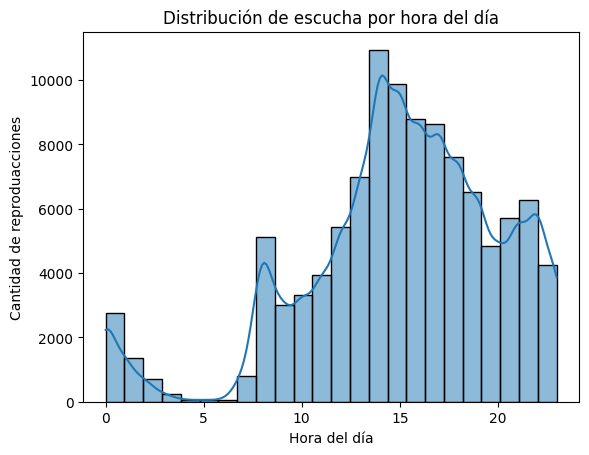

In [48]:
#Gráfico de HORAS más activas
sns.histplot(df['hour'], bins=24, kde=True)
plt.title("Distribución de escucha por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de reproduacciones")
plt.show()

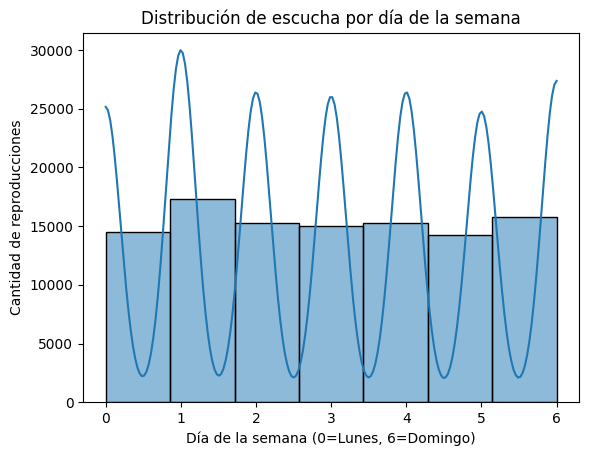

In [49]:
# Gráfico de DÍAS más activos
sns.histplot(df['day_of_week'], bins=7, kde=True)
plt.title("Distribución de escucha por día de la semana")
plt.xlabel("Día de la semana (0=Lunes, 6=Domingo)")
plt.ylabel("Cantidad de reproducciones")
plt.show()

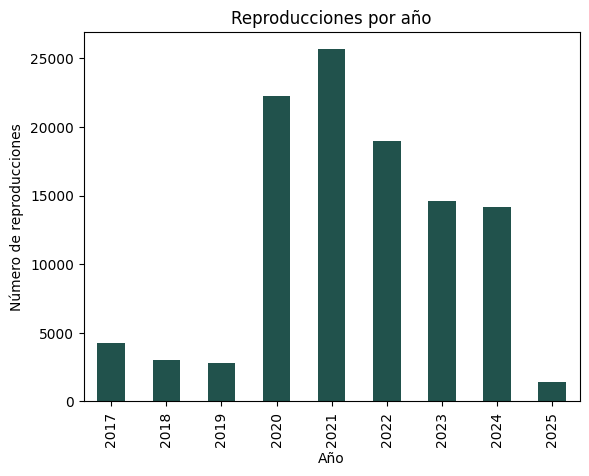

In [50]:
#Comparación entre años
yearly_listening = df.groupby('year')['track'].count()
yearly_listening.plot(kind='bar', color='#21524C')
plt.title("Reproducciones por año")
plt.xlabel("Año")
plt.ylabel("Número de reproducciones")
plt.show()

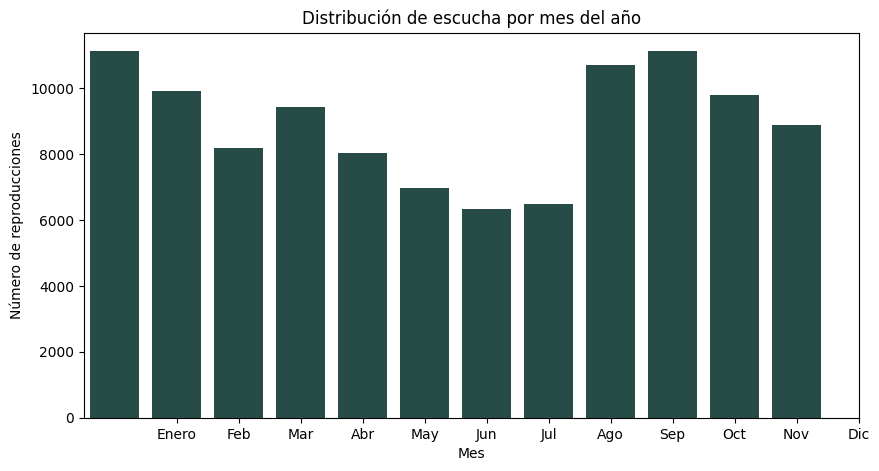

In [57]:
monthly_counts = df.groupby('month')['track'].count()

# Gráfico de distribución de escucha por mes
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, color="#21524C")
plt.xticks(range(1, 13), ['Enero', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.title("Distribución de escucha por mes del año")
plt.xlabel("Mes")
plt.ylabel("Número de reproducciones")
plt.show()